# Regresyon

Regresyon bir bağımlı değişken ile diğer birkaç bağımsız değişken arasındaki ilişkiyi belirler. Regresyon analizi, bağımsız değişkenlerin bazıları değiştiğinde bağımlı değişkenin nasıl değiştiğini anlamaya yardımcı olmaktadır.

*   Makine Öğrenmesi Modeli'nin tahmin edeceği değer sürekli bir değerse bu tür bir problem, regresyon problemi kategorisine girer
*   Lineer Regresyon Kullanılır



## Lineer Regresyon

Lineer Regresyon'da en uygun düz çizgi (regresyon çizgisi olarak da bilinir) kullanarak bağımlı değişken (Y) ile bir veya daha fazla bağımsız değişken (X) arasında bir ilişki kurar.

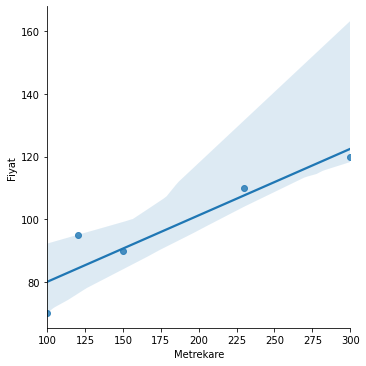

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Fiyat':[70, 90, 95, 120, 110]})

sns.lmplot(x='Metrekare', y='Fiyat', data = df)

 ***y = wx + b***


*   y = label (Fiyat)
*   w = Weight of x
*   x = Feature (Metrekare)
*   b = bias

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Fiyat':[70, 90, 95, 120, 110]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


reg = LinearRegression().fit(X, y)
print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8460528874197938
Coefficient: [0.21223022]
Intercept: 58.79856115107912


In [ ]:
metrekare = int(input("Lütfen fiyat tahminini yapacağınız metrekareyi giriniz: "))
print(f"{metrekare} metrekare evin tahmini fiyatı: {reg.predict(np.array([[metrekare]]))}")

Lütfen fiyat tahminini yapacağınız metrekareyi giriniz: 15
15 metrekare evin tahmini fiyatı: [61.98201439]


In [ ]:
metrekare * reg.coef_[0] + float(reg.intercept_)

61.98201438848919

## Multiple Lineer Regresyon

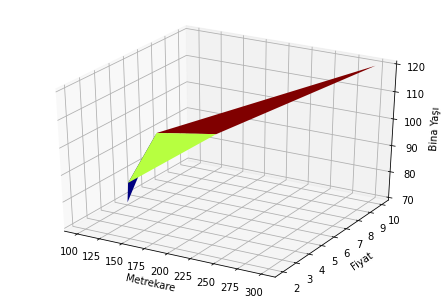

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Bina Yaşı':[5, 2, 6, 10, 3], 'Fiyat':[70, 90, 95, 120, 110]})

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df['Metrekare'], df['Bina Yaşı'], df['Fiyat'], cmap=cm.jet, linewidth=0.2)
ax.set_xlabel('Metrekare')
ax.set_ylabel('Fiyat')
ax.set_zlabel('Bina Yaşı')
plt.show()

 ***y = w1x1 + w2x2 + c***


*   y = label (Fiyat)
*   w1 = Weight of x1 
*   x1 = Feature 1 (Metrekare)
*   w2 = Weight of x2
*   x2 = Feature 2 (Bina Yaşı)  
*   c = bias

In [ ]:
df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Bina Yaşı':[5, 2, 6, 10, 3], 'Fiyat':[70, 90, 95, 120, 110]})

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

reg = LinearRegression().fit(X, y)
print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8465258951131542
Coefficient: [ 0.21520796 -0.15619124]
Intercept: 59.0747612003911


### Non-Lineer - Polynomial Regresyon

Lineer regresyonun aksine bağımlı ve bağımsız değişkenler arasındaki ilişki doğrusal değildir.

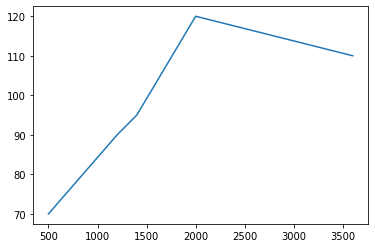

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data = {'Metrekare':[100, 150, 160, 200, 230], 'Yükseklik':[50, 60, 70, 80, 90], 'Genişlik': [10, 20, 20, 25, 40], 'Fiyat':[70, 90, 95, 120, 110]})

df['Alan'] = df['Yükseklik'] * df['Genişlik']
df.drop(columns = ['Yükseklik', 'Genişlik'])

plt.plot(df['Alan'], df['Fiyat'])

  y = ax ** 3 + b

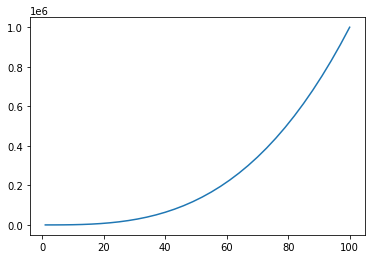

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data = {'Metrekare': range(1,101, 3)})

df['Fiyat'] = df['Metrekare'] ** 3

plt.plot(df['Metrekare'], df['Fiyat'])

## Regresyon Modelimizin Performansını Ölçmek

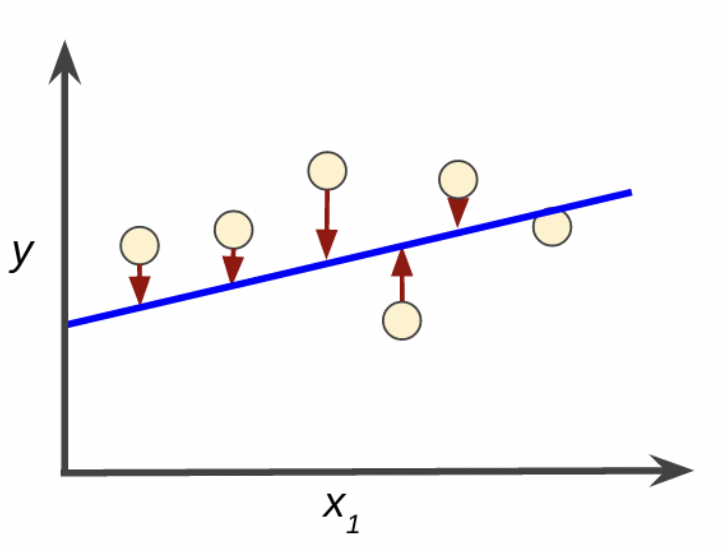

In [ ]:
!pip install scikit-learn==0.23

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Fiyat':[70, 90, 95, 120, 110]})

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

reg = LinearRegression().fit(X, y)

toplam_hata = 0
for idx in range(len(df)):
  gercek_fiyat = df.loc[idx]['Fiyat']
  metrekare = df.loc[idx]['Metrekare']

  tahmin_fiyat = reg.predict([[metrekare]])[0]

  print(f"{df.loc[idx]['Metrekare']} metrekare için gerçek fiyat: {gercek_fiyat}. Tahmin edilen fiyat: {tahmin_fiyat}. HATA: {gercek_fiyat - tahmin_fiyat}")
  toplam_hata = gercek_fiyat - tahmin_fiyat

print(f"\nToplam Hata: {toplam_hata}")

100 metrekare için gerçek fiyat: 70. Tahmin edilen fiyat: 80.02158273381295. HATA: -10.021582733812949
150 metrekare için gerçek fiyat: 90. Tahmin edilen fiyat: 90.63309352517986. HATA: -0.6330935251798593
120 metrekare için gerçek fiyat: 95. Tahmin edilen fiyat: 84.2661870503597. HATA: 10.733812949640296
300 metrekare için gerçek fiyat: 120. Tahmin edilen fiyat: 122.46762589928059. HATA: -2.4676258992805913
230 metrekare için gerçek fiyat: 110. Tahmin edilen fiyat: 107.61151079136691. HATA: 2.3884892086330893

Toplam Hata: 2.3884892086330893


## Performansı Ölçme Yöntemleri

### R2 (R squared) 


R², verilerin yerleştirilmiş regresyon hattına ne kadar yakın olduğunun istatistiksel bir ölçüsüdür. Yani doğrusal regresyon modelleri için uygunluk ölçüsüdür.

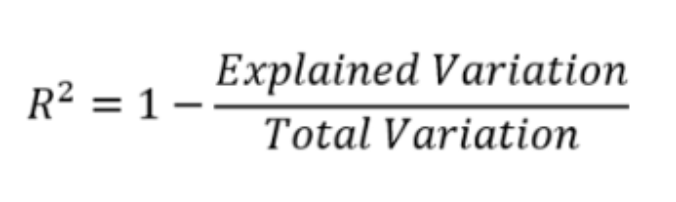




! Yüksek R2 değeri her zaman model iyidir demek değildir. Overfitting durumunda da R2 skorumuz yüksek çıkacaktır.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Bina Yaşı':[5, 2, 6, 10, 3], 'Fiyat':[70, 90, 95, 120, 110]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  metrekare = df.loc[idx]["Metrekare"]
  bina_yasi = df.loc[idx]["Bina Yaşı"]

  y_pred.append(reg.predict([[metrekare,bina_yasi]]))

print(reg.score(X, y)) # X -> Test verisi, y -> Test verilerinin gerçek label değerleri
print(r2_score(y, y_pred)) # y -> Gerçek label değerleri, y_pred -> model tarafından tahmin edilen y değerleri

0.8465258951131542
0.8465258951131542


### Mean Absolute Error (MAE)

MEA, tahmin edilen değerler ile gerçek değerler arasındaki mutlak farkın ortalamasıdır. Hata hesaplarken outlier verileri hesaba katmamak istiyorsanız bu yöntemi kullanabilirsiniz.

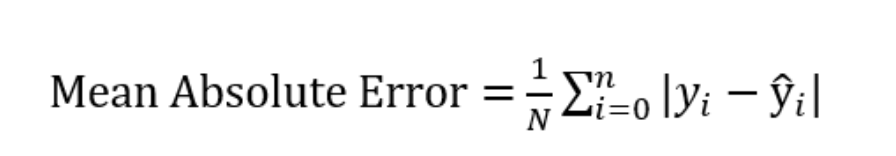

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Bina Yaşı':[5, 2, 6, 10, 3], 'Fiyat':[70, 90, 95, 120, 110]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  metrekare = df.loc[idx]["Metrekare"]
  bina_yasi = df.loc[idx]["Bina Yaşı"]

  y_pred.append(reg.predict([[metrekare,bina_yasi]]))


print(mean_absolute_error(y, y_pred))

5.173364755434096


### Mean Squared Error (MSE)

En sık kullanılan regresyon hata fonksiyonudur. Kare alma işlemi nedeniyle, büyük hataların (gerçek değer ile tahmin değeri arasındaki farkın) MSE üzerinde küçük hatalardan daha fazla etkisi vardır. Bu nedenle MAE, kare operasyonu yapmadığı için aykırı (outlier) değerlere karşı daha sağlamdır. Hata hesaplarken outlier verileri hesaba katmak istiyorsanız bu yöntemi kullanabilirsiniz.

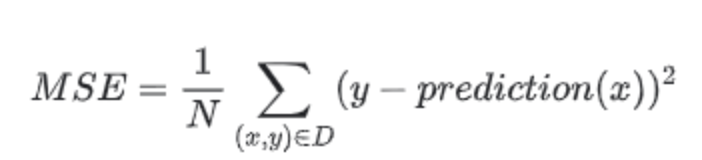



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Bina Yaşı':[5, 2, 6, 10, 3], 'Fiyat':[70, 90, 95, 120, 110]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

reg = LinearRegression().fit(X, y)

y_pred = []

for idx in range(len(df)):
  metrekare = df.loc[idx]["Metrekare"]
  bina_yasi = df.loc[idx]["Bina Yaşı"]

  y_pred.append(reg.predict([[metrekare,bina_yasi]]))


print(mean_squared_error(y, y_pred))

45.42833504650633


## Hata Kardeşler - UNDERFITTING & OVERFITTING

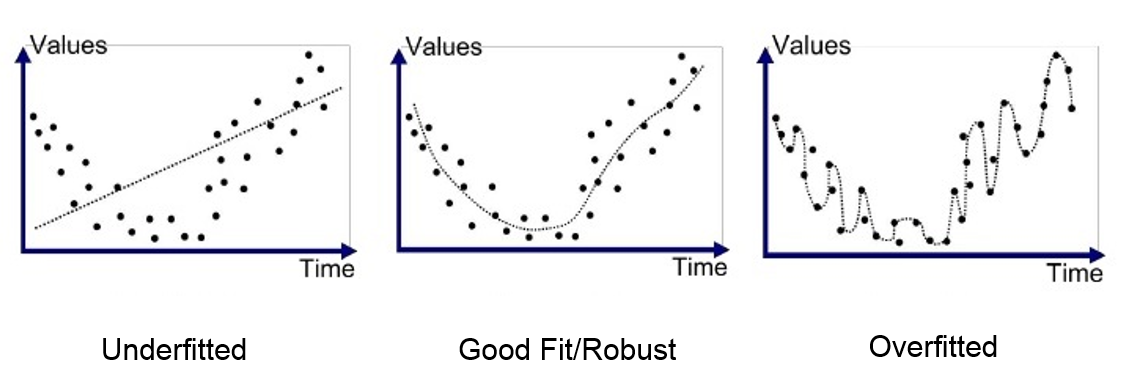

### UNDERFITTING

Yapay Zeka modelimiz verimizin trendini yakalayamadığında ortaya çıkan bir problemdir. Bir başka deyişle, modelimizin veriyi yeterince öğrenememesi veya veriden yeterli anlamı çıkarmamasıdır.

Underfit olan bir model **düşük varyans, yüksek bias** değerlerine sahiptir.

#### Underfitting'i Engellemek İçin Neler Yapılabilir?



1.   Yeni feature değerleri veya katmanlar eklenerek modelin karmaşıklığı arttırılabilir.
2.   Veriden gürültü temizlenebilir
3.   Eğitim sırasında epoch sayısı arttırılabilir



### OVERFITTING

Yapay Zeka modelimiz, verimizin trendini yakalaması gerekenden daha çok yakaladığında ortaya çıkan bir problemdir. Bir başka deyişle, modelimiz ona verdiğimiz veriyi öğrenmekten çok ezberler ve daha önce görmediği veriler üzerinde başarılı bir çıkarım yapamaz.

Overfit olan bir model **yüksek varyans düşük bias** değerlerine sahiptir.

#### Overfitting'i Engellemek İçin Neler Yapılabilir?



1.   Eğitim verisi arttırılabilir
2.   Modelin karmaşıklığı azaltılabilir
3.   Eğitim sırasında erken durdurma (early stopping) yapılabilir
4.   Regularizasyon uygulanabilir



## Hatayı Düşürme Yöntemleri

### Verimizi Eğitim - Test - Validasyon Setlerine Ayırmak (train-test-validation split)


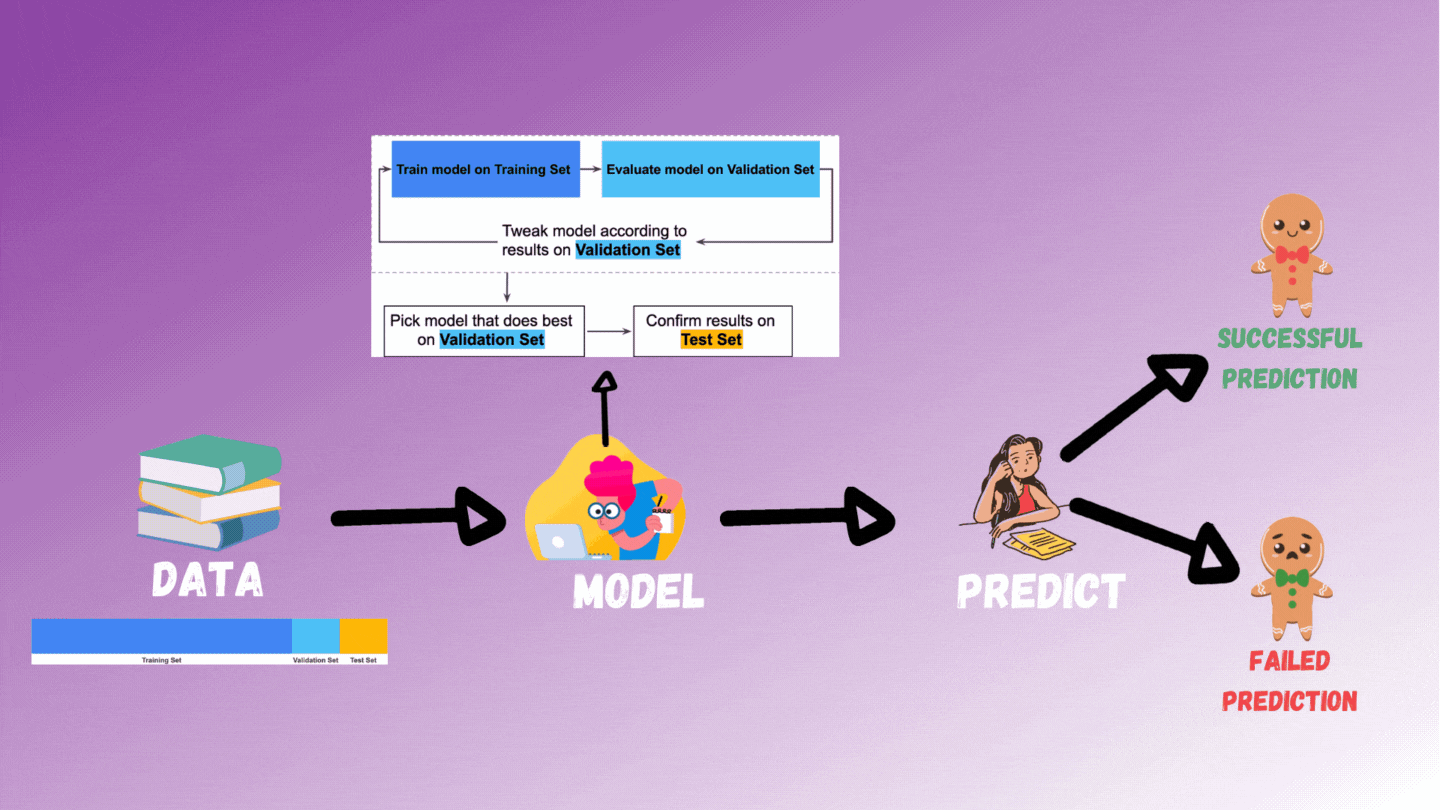

In [ ]:
#train-test split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230, 175, 220, 270, 190, 220], 'Bina Yaşı':[5, 2, 6, 10, 3, 7, 6, 8, 9, 4], 'Fiyat':[70, 90, 95, 120, 110, 120, 95, 140, 220, 100]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train)

(8, 2)
(2, 2)
(8,)
(2,)
[[100   5]
 [120   6]
 [150   2]
 [220   4]
 [270   8]
 [300  10]
 [220   6]
 [230   3]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 7)

print(X_train)

[[100   5]
 [120   6]
 [150   2]
 [220   4]
 [270   8]
 [300  10]
 [220   6]
 [230   3]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 9)

print(X_train)

[[270   8]
 [120   6]
 [150   2]
 [220   4]
 [300  10]
 [100   5]
 [220   6]
 [175   7]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 7)

print(X_train)

[[100   5]
 [120   6]
 [150   2]
 [220   4]
 [270   8]
 [300  10]
 [220   6]
 [230   3]]


In [ ]:
#train-test-validation split
df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230, 175, 220, 270, 190, 220], 'Bina Yaşı':[5, 2, 6, 10, 3, 7, 6, 8, 9, 4], 'Fiyat':[70, 90, 95, 120, 110, 120, 95, 140, 220, 100]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 7)

X_train, X_validasyon, y_train, y_validasyon = train_test_split(X_train, y_train, test_size = 2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_validasyon.shape)
print(y_validasyon.shape)

print(X_train)

(6, 2)
(2, 2)
(6,)
(2,)
(2, 2)
(2,)
[[150   2]
 [300  10]
 [220   4]
 [100   5]
 [270   8]
 [120   6]]


### Erken Durdurma (Early Stopping)

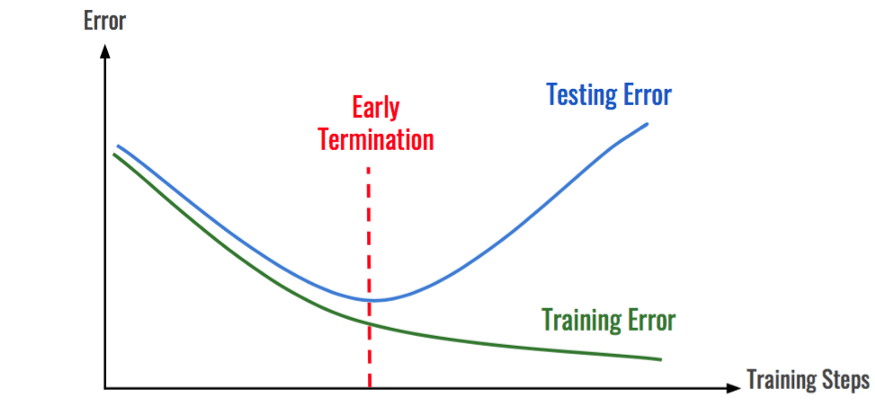

### Gradient Descent Algoritması



Modelimizdeki ağırlık değerlerini hatamızı en aza indirecek şekilde iteratif bir şekilde güncelleyen bir algoritmadır.

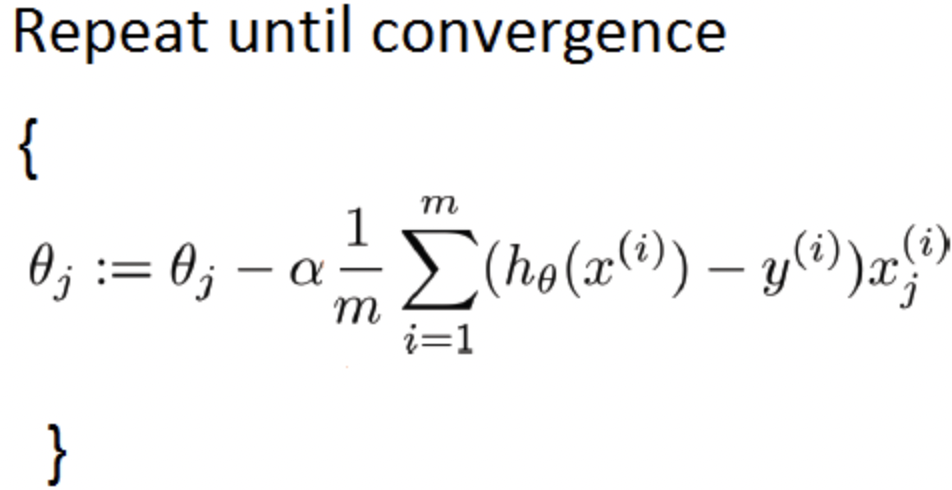

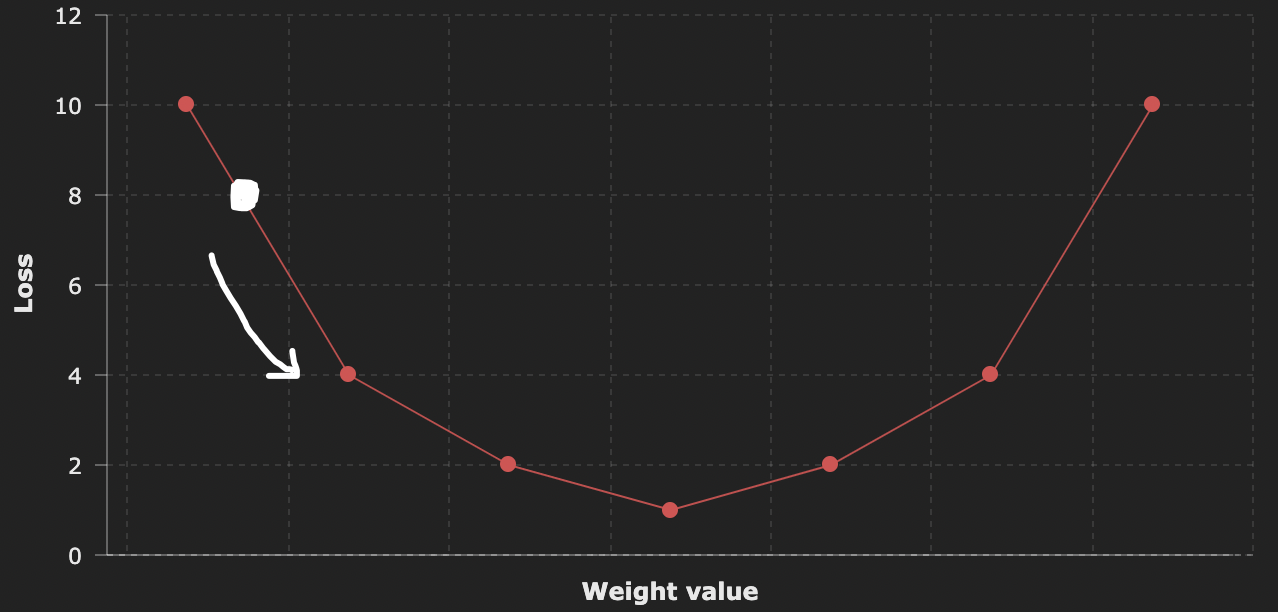

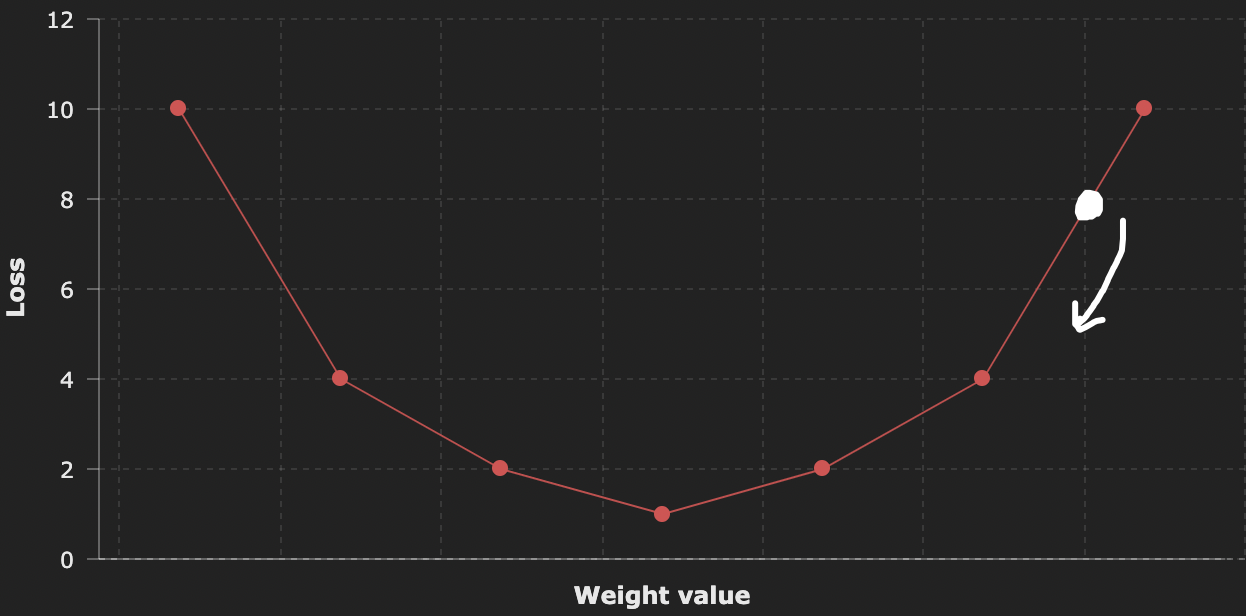

### Regularizasyon


Regülarizasyon, modelin performansını arttırmak için öğrenme algoritmasında küçük değişiklikler yapan bir tekniktir. Bu da modelin görünmeyen veriler üzerindeki performansını iyileştirir. Düzenleme, düzenleme terimi olarak bilinen başka bir terim ekleyerek loss function'ı günceller.




***LOSS FUNCTION() + REGULARIZATION***

#### L1 (Lasso) Regülarizasyon

L1 Regülarizasyonda hata fonksiyonumuzu ağırlıkların mutlak değeri ile cezalandırıyoruz. 

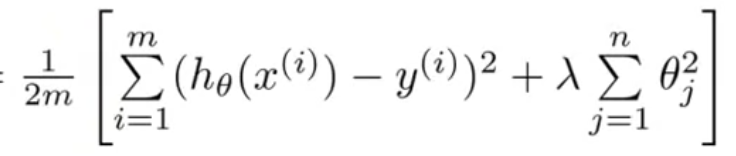

**Gradient Descent Implementasyonu**



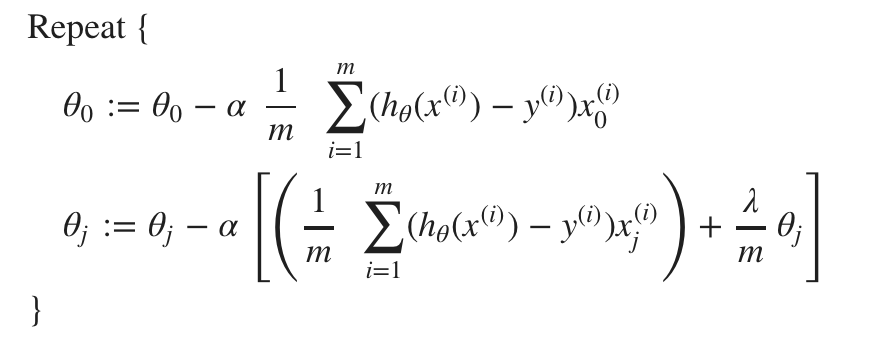

In [ ]:
from sklearn.linear_model import Lasso

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Bina Yaşı':[5, 2, 6, 10, 3], 'Fiyat':[70, 90, 95, 120, 110]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

model = Lasso(alpha=0.1)
model.fit(X, y)

print(model.coef_)
print(model.score(X, y))
print(model.intercept_)

model.predict([[300, 9]])

[ 0.21485124 -0.1384319 ]
0.8465197737595426
59.04662250437324


array([122.2561077])

https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization

#### L2 (Ridge) Regülarizasyon

L2 Regülarizasyonda hata fonksiyonumuzu ağırlıkların karesi ile cezalandırıyoruz. 

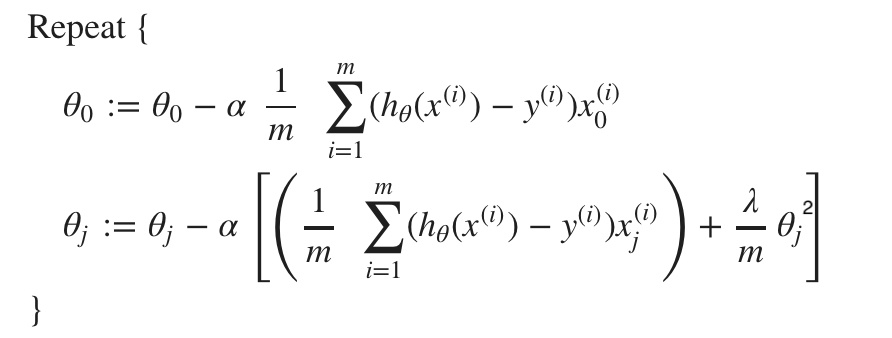

In [ ]:
from sklearn.linear_model import Ridge

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230], 'Bina Yaşı':[5, 2, 6, 10, 3], 'Fiyat':[70, 90, 95, 120, 110]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

model = Ridge(alpha=0.1)
model.fit(X, y)

print(model.coef_)
print(model.score(X, y))
print(model.intercept_)

model.predict([[300, 9]])

[ 0.21519658 -0.15563458]
0.8465258890938407
59.07391617007209


array([122.23217769])

### Cross Validation

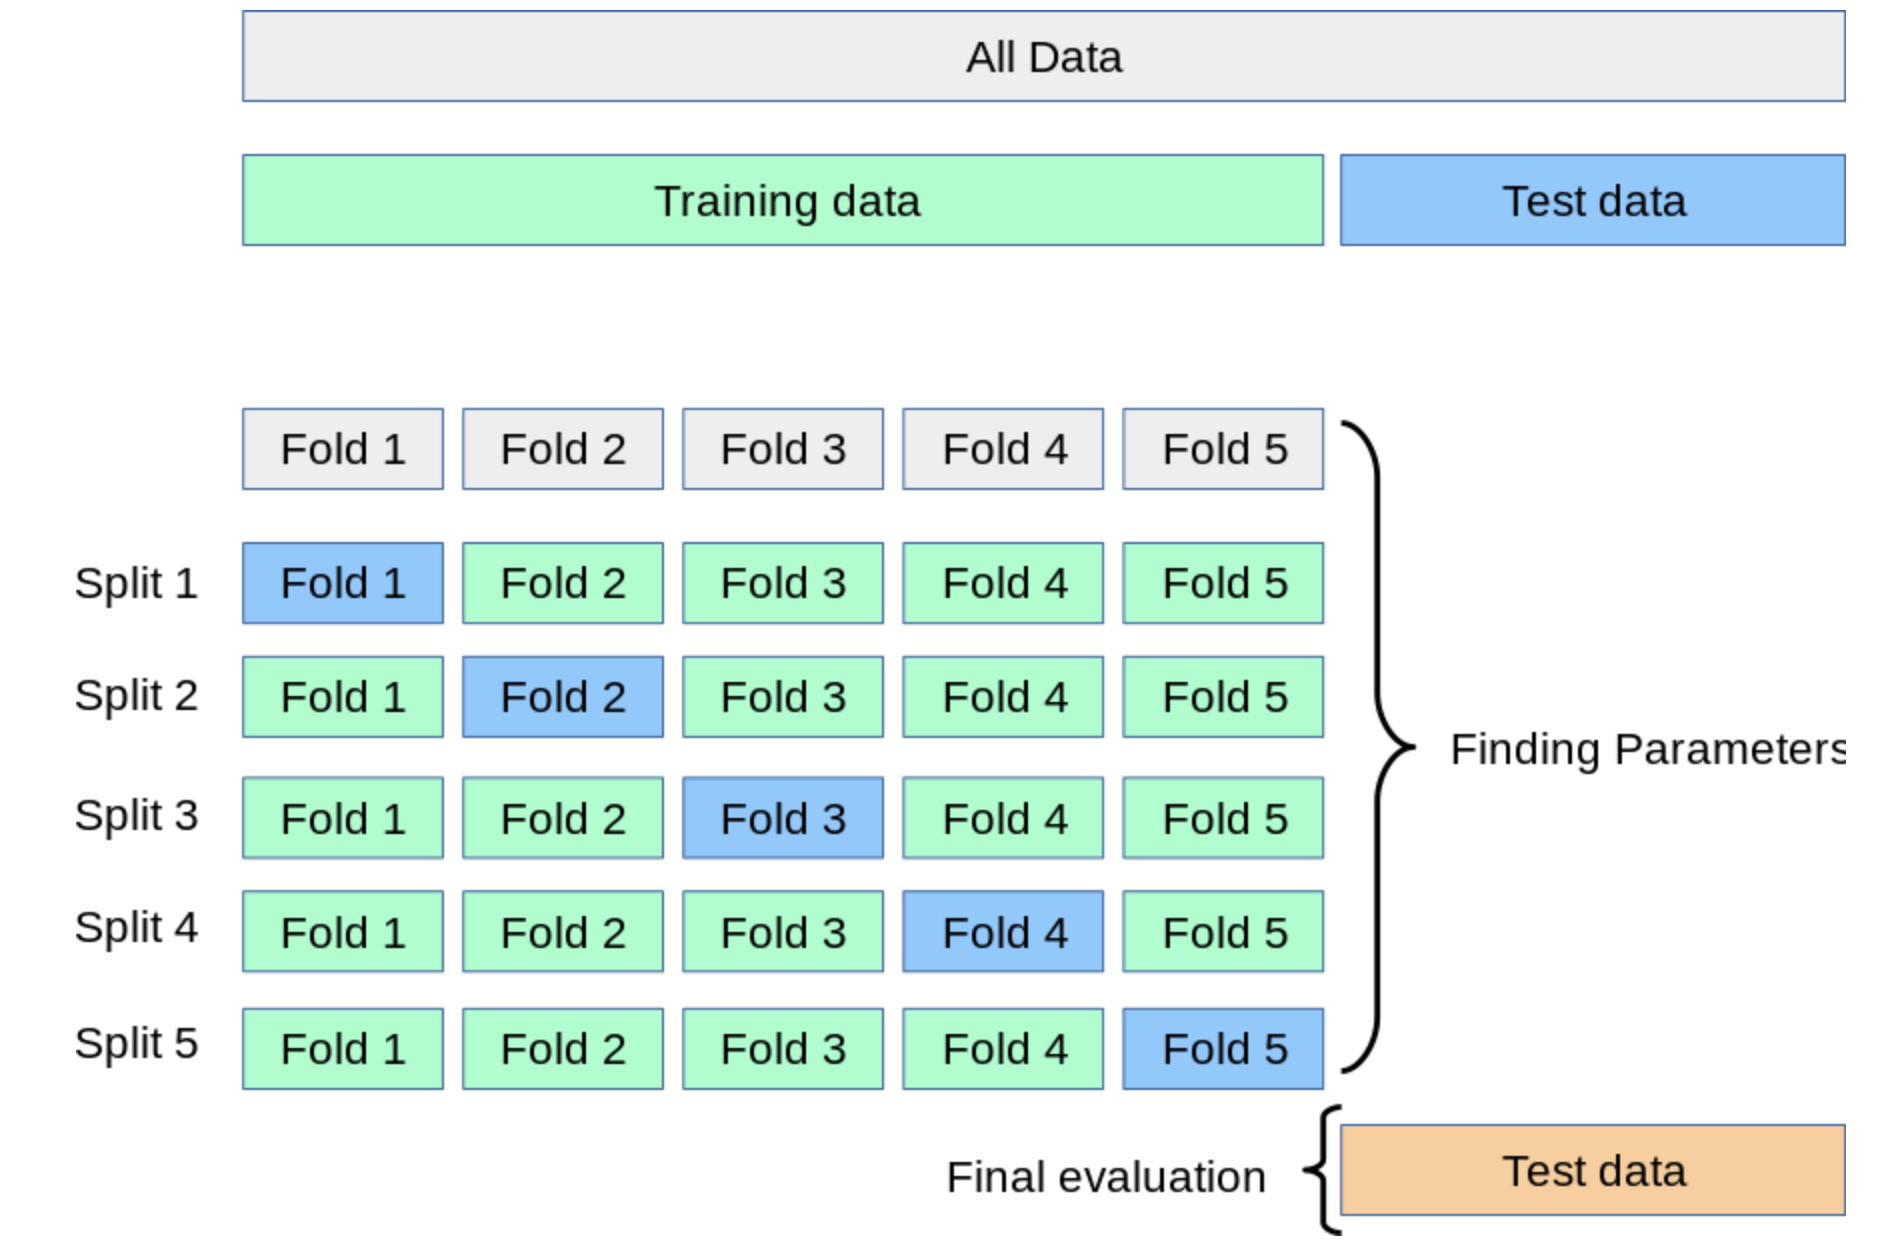

Cross-validation, makine öğrenmesi modelinin performansını arttırmak için kullanılan istatistiksel bir yeniden örnekleme(resampling) yöntemidir.

#### Train_test_split ile R2 Skorlama

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y = True, as_frame=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 7)

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

-86.6320900882271


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 9)

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

-12.44618482320572


#### cross_valdiate ile r2 skorlama

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge

X, y = datasets.load_diabetes(return_X_y = True, as_frame=True)


model = Ridge(alpha=0.1)
model.fit(X, y)

accuracies = cross_val_score(model, X, y, cv=10, scoring = "r2")
mean_accuracies = accuracies.mean()
print(mean_accuracies)

0.4633240541517593


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

X, y = datasets.load_diabetes(return_X_y = True, as_frame=True)


model = Lasso(alpha=0.1)
model.fit(X, y)

accuracies = cross_val_score(model, X, y, cv=10, scoring = "r2")
mean_accuracies = accuracies.mean() * 100
print(mean_accuracies)

46.31674537430873


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

X, y = datasets.load_diabetes(return_X_y = True, as_frame=True)


model = LinearRegression()
model.fit(X, y)

accuracies = cross_val_score(model, X, y, cv=10, scoring = "r2")
mean_accuracies = accuracies.mean() * 100
print(mean_accuracies)

46.1962361958337


In [ ]:
import sklearn

print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


#### K-Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

X, y = datasets.load_diabetes(return_X_y = True, as_frame=True)

lr = LinearRegression()
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=kf)
  print(scores)

[0.47679097 0.42546035 0.56103442 0.41649233 0.53706543]
[0.44656828 0.33644155 0.56506332 0.38259722 0.56774572]
[0.4385752  0.44132351 0.50199262 0.41545571 0.55702521]
[0.43379056 0.48312186 0.30536911 0.58528593 0.54544558]
[0.42350087 0.4578918  0.31988896 0.55806153 0.45001964]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(data = {'Metrekare':[100, 150, 120, 300, 230, 200, 170, 90, 120, 150], 'Bina Yaşı':[5, 2, 6, 10, 3, 1, 2 ,3, 4, 10], 'Fiyat':[70, 90, 95, 120, 110, 200, 210, 120, 90, 100]})
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

lr = LinearRegression()
kf = KFold(n_splits=5)


for train_index, test_index in kf.split(X): #indexler
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  


#optimum_train_test_split = train_test_splits[scores[0].index(scores[0].max())]




TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]


## Gerçek Hayat Senaryosu

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X, y = datasets.load_boston(return_X_y = True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = linear_model.Lasso(alpha = 0.1)

model.fit(X_train, y_train)

#model.predict([0.038076, 0.050680])

TypeError: ignored

In [ ]:
X_train.loc[0]